<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRUG - LIPID SOLUBILITY PREDICTOR**

Choose any of the below option.
:- *If First option through error then add LogP values manually in second option. You may use XlogP predictor for it.*

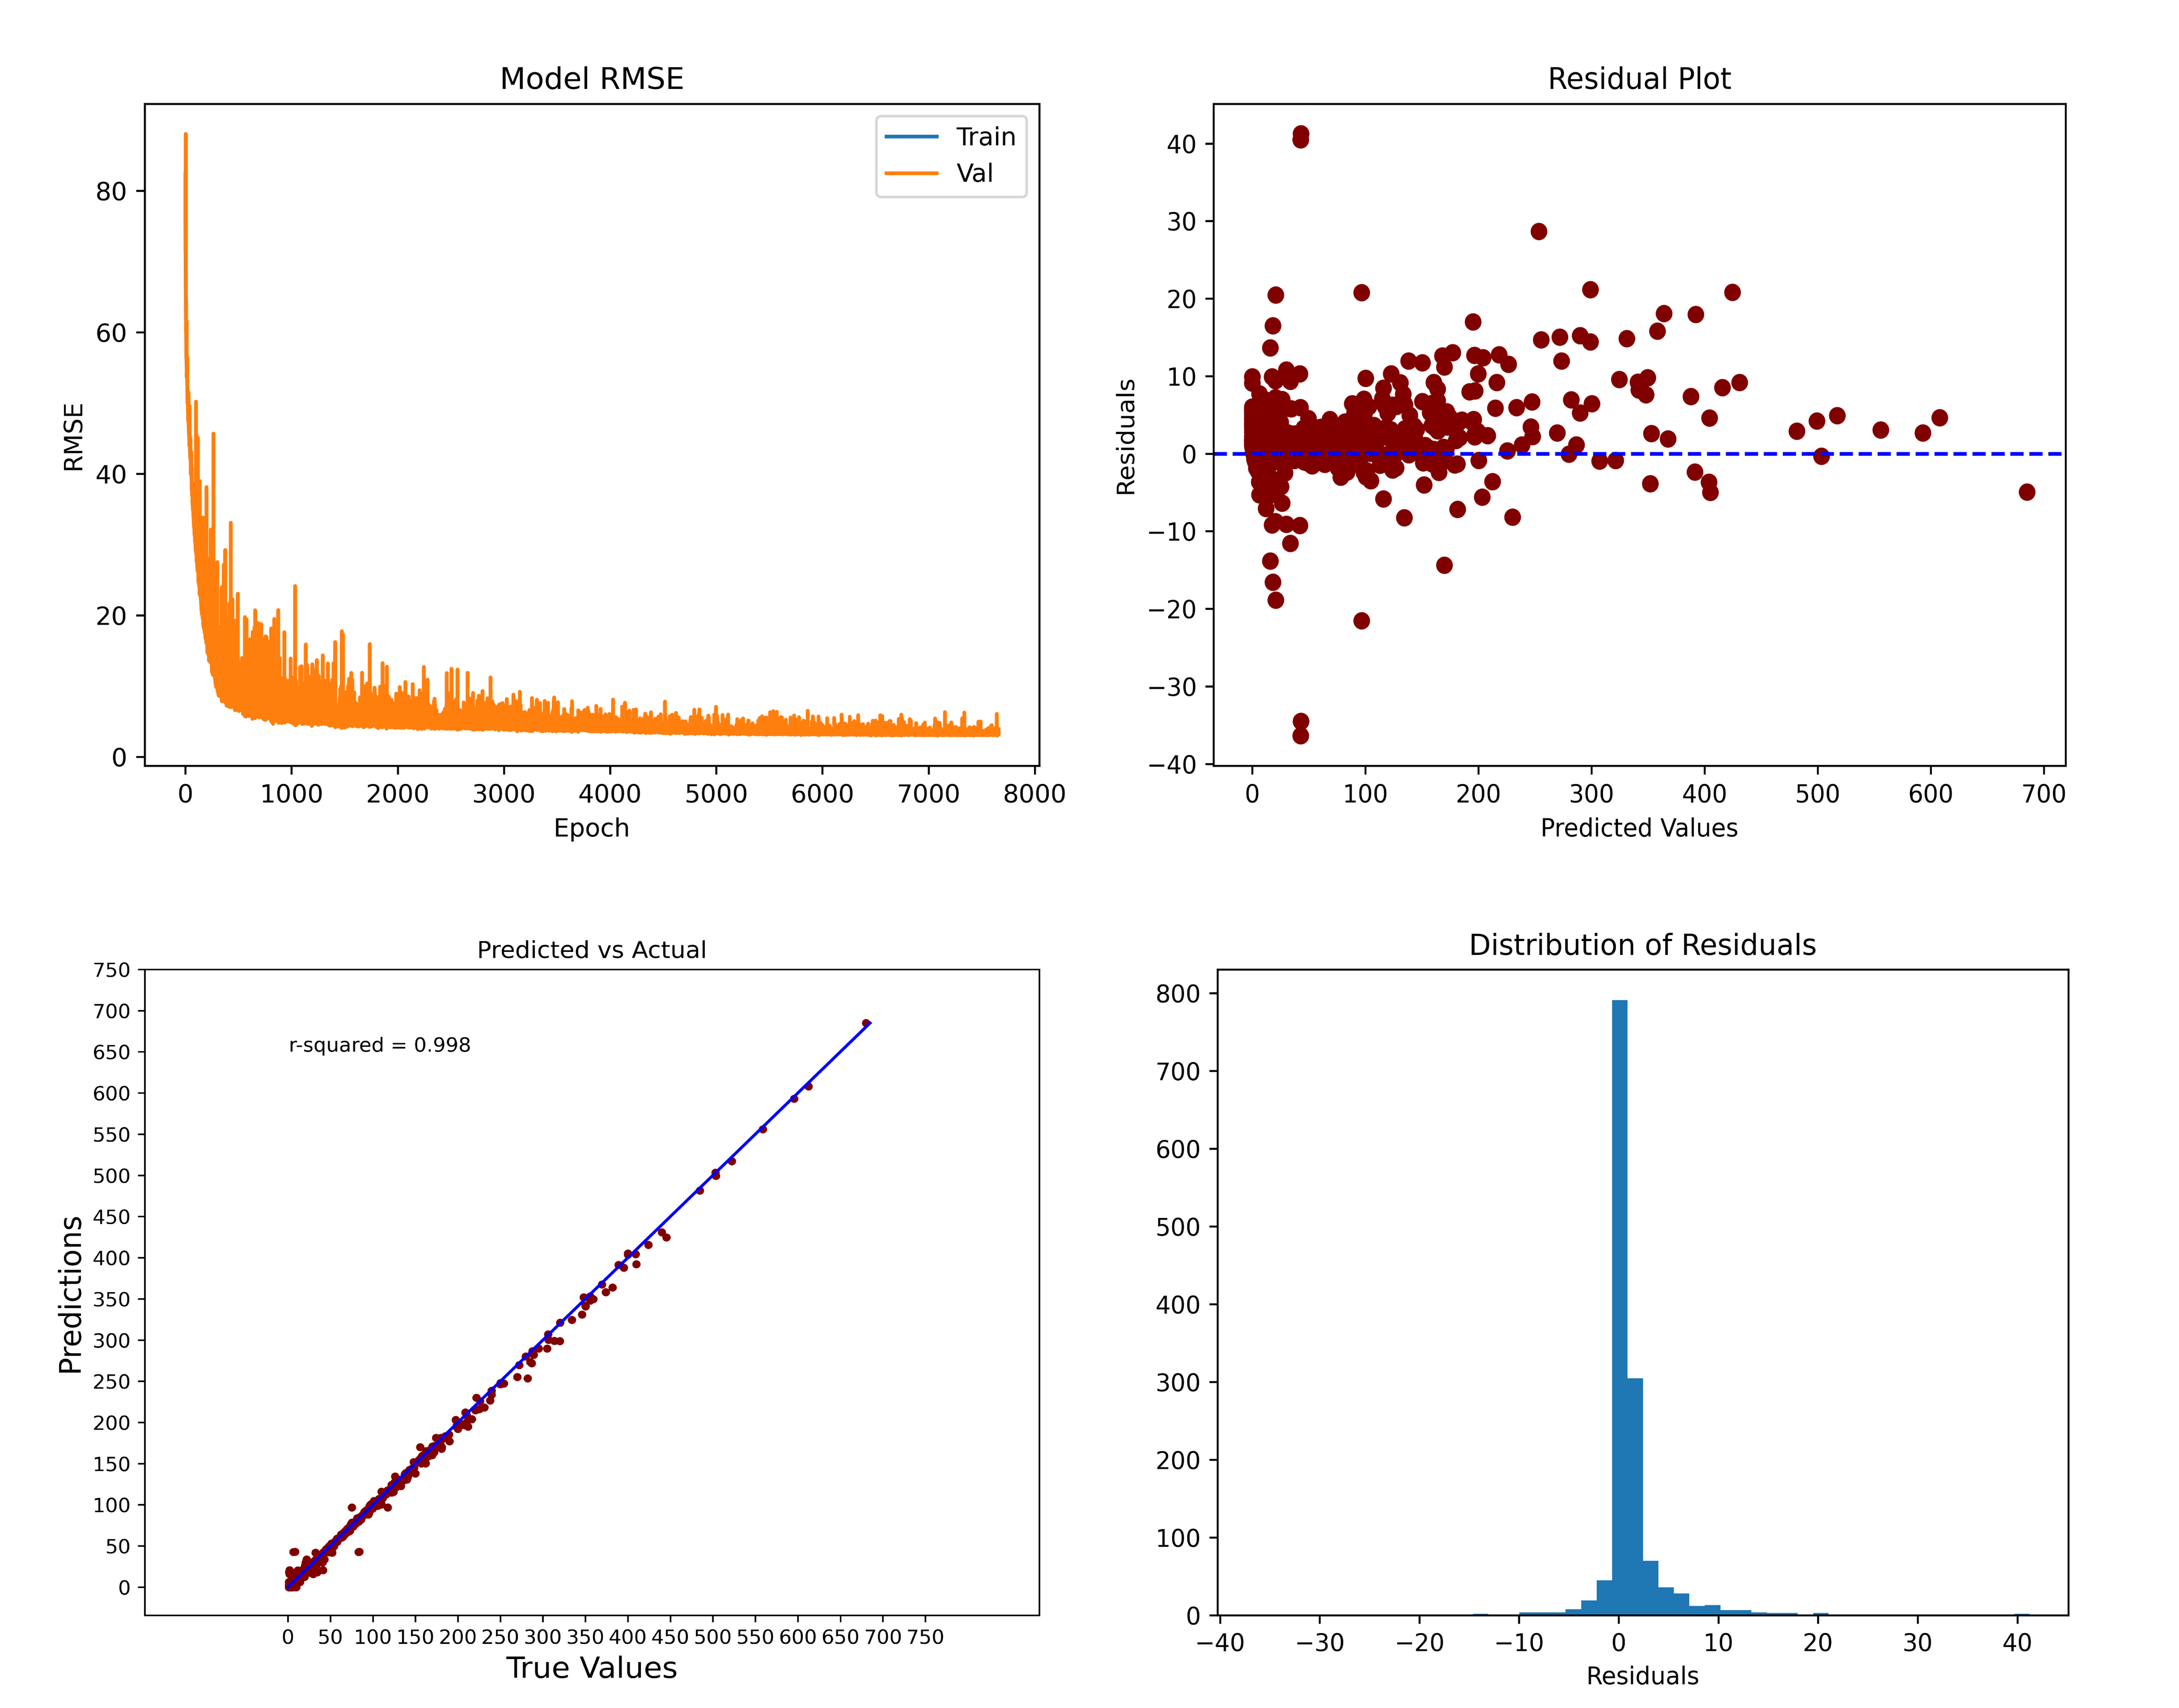

In [ ]:
!pip install pubchempy
!pip install gdown

import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n'  # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5'  # Desired destination path

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)

# Drug and Excipient CID
Drug_CID = 135398740 #@param {type:"number"}
Excipient_CID = 10850 #@param {type:"number"}

# Fetch logP and Mol. Wt of Drug and Excipient
logp_D = pcp.Compound.from_cid(Drug_CID).xlogp
logp_C = pcp.Compound.from_cid(Excipient_CID).xlogp
Molwt_of_Drug = pcp.Compound.from_cid(Drug_CID).molecular_weight
Molwt_of_Excipient = pcp.Compound.from_cid(Excipient_CID).molecular_weight

# Check if any value is not available
if logp_D is None or logp_C is None or Molwt_of_Drug is None or Molwt_of_Excipient is None:
    print("USE OPTION - 2 [LOG P OR MOL. WT NOT AVAILABLE]")
else:
    # Convert logP and Mol. Wt values to the required units
    logp_D = float(logp_D) / 100
    logp_C = float(logp_C) / 100
    Molwt_of_Drug = float(Molwt_of_Drug) / 1000
    Molwt_of_Excipient = float(Molwt_of_Excipient) / 1000

    # Fetch Fingerprint of Drug and Carrier
    CID_D = pcp.Compound.from_cid(Drug_CID)
    CID_E = pcp.Compound.from_cid(Excipient_CID)
    FPD = CID_D.cactvs_fingerprint
    FPE = CID_E.cactvs_fingerprint

    # Combine all features into a single list
    List1 = [Molwt_of_Drug, Molwt_of_Excipient, logp_D, logp_C]
    List2 = list(FPD)
    List3 = list(FPE)
    List = List1 + List2 + List3

    # Convert to DataFrame and prepare for prediction
    t = pd.DataFrame(np.array(List).reshape(-1, len(List)))
    dataset1 = t.values
    X_Predict = (dataset1[:, 0:1766].astype(float))

    # Make prediction
    Y_prediction = model.predict(X_Predict)
    print(Y_prediction, "mg/ml")


In [ ]:
#@title #**OPTION : 2** - Insert PubChem CID of Drug and Carrier (Oil, Surfactant, Cosurfactant), LogP and Moleculr Weights
!!pip install pubchempy
!pip install gdown

import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n'  # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5'  # Desired destination path

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)



Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title  #**OPTION : 3** - If No CID available: Add SMILES, LogP and Mol. Wt for both Drug and Excipient and Run Both Cells (Shift + Enter)
#%%capture
!pip install pubchempy
!pip install padelpy
!pip install googledrivedownloader
from padelpy import from_smiles
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n'  # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5'  # Desired destination path

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

# Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)

Drug_SMILE = "C1CO1.C(C(CO)O)O" #@param {type:"string"}
Excipient_SMILE = "COC1=C(C=CC(=C1)C=CC(=O)O)O" #@param {type:"string"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

CID_D = from_smiles(Drug_SMILE, fingerprints=True, descriptors=False)
CID_E = from_smiles(Excipient_SMILE, fingerprints=True, descriptors=False)

FPD = list(CID_D.values())
FPE = list(CID_E.values())

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3

import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title  #**OPTION : 4** - UPLOAD EXCEL (Predict_SMILE.xlsx) for Multiple Prediction and Run Cell- For Downloading Predict_SMILE.xlsx [CLICK HERE](https://github.com/Swayamprakashpatel/Sol_ME/raw/main/Predict_SMILE.xlsx)- **DO NOT RENAME FILE NAME**

#%%capture

!pip install pubchempy
!pip install padelpy
!pip install googledrivedownloader
from padelpy import from_smiles
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
import gdown
from google.colab import files # Keep this import for file operations

file_id = '19vWbg_CKrTmgTupKjVsNerZCQGo-gi0n' # Replace with your actual file ID
destination = '/content/sample_data/Sol_ME.hdf5' # Desired destination path

print("Downloading model file...")
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)
print("Model download complete.")

# Load Model
print("Loading model...")
model = load_model('/content/sample_data/Sol_ME.hdf5', compile=False)
print("Model loaded successfully.")

# Prompt for file upload
print("\nPlease upload the 'Predict_SMILE.xlsx' file.")
uploaded = files.upload()

# Check if the file was uploaded successfully
if 'Predict_SMILE.xlsx' not in uploaded:
    print("Error: 'Predict_SMILE.xlsx' not found in uploaded files. Please ensure you upload the file with the correct name.")
else:
    # Load input data from Excel
    input_file_path = '/content/Predict_SMILE.xlsx'
    try:
        data = pd.read_excel(input_file_path)
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        exit()

    print(f"Loaded {len(data)} rows from Predict_SMILE.xlsx")

    # Preprocess the data
    def preprocess_data(row):
        Drug_SMILE = row['Drug_SMILE']
        Excipient_SMILE = row['Excipient_SMILE']

        # Normalize continuous features
        LogP_of_Drug = row['LogP_of_Drug'] / 100
        LogP_of_Excipient = row['LogP_of_Excipient'] / 100
        MolWt_of_Drug = row['MolWt_of_Drug'] / 1000
        MolWt_of_Excipient = row['MolWt_of_Excipient'] / 1000

        # Calculate PaDEL fingerprints (this can sometimes return strings)
        CID_D = from_smiles(Drug_SMILE, fingerprints=True, descriptors=False)
        CID_E = from_smiles(Excipient_SMILE, fingerprints=True, descriptors=False)

        # Extract values and *CRITICAL FIX*: Convert fingerprint strings ('0'/'1') to integers
        FPD_values = list(CID_D.values())
        FPE_values = list(CID_E.values())

        # Convert the string fingerprints to integers (0 or 1)
        FPD = [int(val) for val in FPD_values]
        FPE = [int(val) for val in FPE_values]

        # Combine all features
        List1 = [MolWt_of_Drug, MolWt_of_Excipient, LogP_of_Drug, LogP_of_Excipient]
        List = List1 + FPD + FPE

        return List

    # Apply preprocessing
    preprocessed_data = data.apply(preprocess_data, axis=1)

    # Convert list of lists/features into a NumPy array for prediction
    X_Predict = np.array(preprocessed_data.tolist(), dtype=np.float32) # Ensure final array is float type

    # Perform predictions
    print("\nPerforming predictions...")
    Y_prediction = model.predict(X_Predict)
    print("Predictions complete.")

    # Add predictions to the DataFrame
    data['Prediction'] = Y_prediction

    # Save the results to an Excel file
    output_file_path = 'Predict_SMILE_Result.xlsx'
    data.to_excel(output_file_path, index=False)
    print(f"\nResults saved to '{output_file_path}'")

    # Provide a download link for the user
    print("Downloading results file...")
    files.download(output_file_path)
    print("Download initiated.")